### Purpose of the Dataset

This data set is from the well-known UCI Machine Learning Repository. The objective of this notebook is to correctly forecast, based on the provided features, whether or not an adult earns more than $50,000 USD per year.


### About the Dataset

This data set is from the well-known UCI Machine Learning Repository. The objective of this notebook is to correctly forecast, based on the provided features, whether or not an adult earns more than $50,000 USD per year.

The data set selected is “Adult Census Income” attached is the link for easy reference – https://archive.ics.uci.edu/ml/datasets/Adult

Age: Describes the age of individuals. Continuous.

Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: Continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. education-num: Number of years spent in education. Continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: Continuous.

capital-loss: Continuous.

hours-per-week: Continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: >50K,<=50K

### Step1: Import all required libraries

In [1]:
import pandas as pd
from sklearn import *
from sklearn import preprocessing 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings 
warnings.filterwarnings('ignore')
from __future__ import print_function
from sklearn.neural_network import MLPClassifier
import os
import tensorflow as tf2
from tensorflow import keras
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

### Step2: Load the data, clean and prepare data for analysis

In [2]:
final_df = pd.read_csv("census_final_df.csv") # change this path depending on where you store the file on your computer

In [3]:

final_df.head(5)

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL_STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL_GAIN,CAPITAL_LOSS,HOURS_PER_WEEK,NATIVE_COUNTRY,INCOME
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


### Step3: Split Data

Split data into a 70/30 split.

In [4]:
train_df, test_df = train_test_split(final_df, test_size=0.3)
target = 'INCOME'
predictors = ['AGE','EDUCATION','EDUCATION-NUM','MARITAL_STATUS','OCCUPATION','RELATIONSHIP','RACE','SEX','CAPITAL_GAIN','CAPITAL_LOSS','HOURS_PER_WEEK']



In [5]:
train_X = train_df[predictors]
train_y = train_df[target]
test_X = test_df[predictors]
test_y = test_df[target]

### MLP CLASSIFIER WITHOUT HYPER PARAMETER TUNING

In [10]:
%%time

model1 = MLPClassifier(
    hidden_layer_sizes=(60,50,40), 
    activation = 'relu',
    solver='adam',
    alpha=0.0001, # Strength of the L2 regularization term
    batch_size='auto',
    learning_rate = 'constant',
    learning_rate_init = 0.001,
    max_iter=200,
    tol=0.00001, 
    early_stopping = True,
    n_iter_no_change = 5,
    verbose=True
    
)
_ = model1.fit(train_X, train_y)

# Currently (version 1.2.2), MLPClassifier supports only the Cross-Entropy loss function.
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Iteration 1, loss = 1.24575233
Validation score: 0.768564
Iteration 2, loss = 1.05550155
Validation score: 0.770587
Iteration 3, loss = 0.59803794
Validation score: 0.782722
Iteration 4, loss = 0.53206965
Validation score: 0.795435
Iteration 5, loss = 0.55946760
Validation score: 0.800925
Iteration 6, loss = 0.88925820
Validation score: 0.762785
Iteration 7, loss = 0.60481023
Validation score: 0.810748
Iteration 8, loss = 0.61702348
Validation score: 0.791101
Iteration 9, loss = 0.53477112
Validation score: 0.771453
Iteration 10, loss = 0.58766006
Validation score: 0.783589
Iteration 11, loss = 0.50642998
Validation score: 0.813349
Iteration 12, loss = 0.50903295
Validation score: 0.811904
Iteration 13, loss = 0.56977155
Validation score: 0.814216
Iteration 14, loss = 0.47783654
Validation score: 0.811326
Iteration 15, loss = 0.88773761
Validation score: 0.817972
Iteration 16, loss = 0.47147674
Validation score: 0.820572
Iteration 17, loss = 0.46146276
Validation score: 0.819127
Iterat

In [11]:
model1.loss_curve_

[1.2457523260132624,
 1.0555015474662144,
 0.5980379380094749,
 0.5320696506472177,
 0.5594676017748385,
 0.8892581964116539,
 0.6048102323488791,
 0.617023483382069,
 0.534771117457896,
 0.587660060669622,
 0.5064299789151251,
 0.5090329543374335,
 0.5697715542489241,
 0.4778365417523743,
 0.8877376139502139,
 0.47147673593181005,
 0.4614627551877781,
 0.6318256576987272,
 0.44113288207957124,
 0.4516726228677411,
 0.4331979603796138,
 0.44757689668569584]

In [12]:
%%time
y_pred = model1.predict(test_X)

CPU times: total: 78.1 ms
Wall time: 34.1 ms


In [13]:
print(classification_report(test_y, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8491    0.7692    0.8072      7516
           1     0.7838    0.8596    0.8199      7316

    accuracy                         0.8138     14832
   macro avg     0.8165    0.8144    0.8136     14832
weighted avg     0.8169    0.8138    0.8135     14832



In [14]:
y_pred = model1.predict(test_X)
y_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

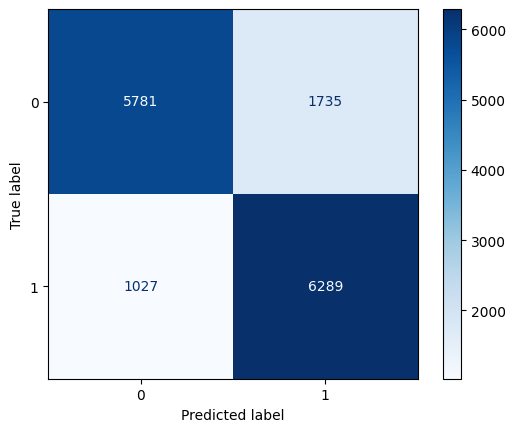

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## MLP CLASSIFIER With RandomizedSearchCV

With Randomized and Grid search functions, we attempt to identify the model hyper-parameters that yield the optimal score value. For instance, if given accuracy, RandomizedSearchCV will:
1. Sample from the parameter distribution.
2. Fit the model (which involves the solver identifying the lowest log-loss).
3. Calculate the score for that model.

In the code below, note that ```scoring='RECALL'```, therefore, RandomizedSearchCV will identify the 'best' model as the one that achived the highest RECALL SCORE.

In [16]:
%%time

param_distributions = {
    'hidden_layer_sizes': [ (64,), (128,),(128,64), (64,128)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0, .0001, .0005],
    'batch_size': [25, 50],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.0005, 0.001],
    'max_iter': [5000],
    'tol': [0.000005, 0.00001],
    'early_stopping':[True],
    'n_iter_no_change':[5],
}

random_search = RandomizedSearchCV(
    estimator = MLPClassifier(), # a blank slate... RandomizedSearchCV will send parameters.
    param_distributions=param_distributions, 
    cv=3, 
    n_iter=300,
    scoring='recall', # note that we could also choose any other scoring metric that is appropriate for a multi-class problem - such as f1_macro, f1_micro, f1_weighted, etc.
    verbose=1, 
    n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
    return_train_score=True
)

_ = random_search.fit(train_X, train_y)


Fitting 3 folds for each of 300 candidates, totalling 900 fits
CPU times: total: 1min 21s
Wall time: 57min 16s


In [17]:
model2 = random_search.best_estimator_

print(random_search.best_params_)

{'tol': 5e-06, 'solver': 'sgd', 'n_iter_no_change': 5, 'max_iter': 5000, 'learning_rate_init': 0.001, 'learning_rate': 'constant', 'hidden_layer_sizes': (128, 64), 'early_stopping': True, 'batch_size': 25, 'alpha': 0.0001, 'activation': 'relu'}


In [18]:
%%time
y_pred = model2.predict(test_X)

print(classification_report(test_y, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8524    0.7286    0.7857      7516
           1     0.7574    0.8704    0.8100      7316

    accuracy                         0.7985     14832
   macro avg     0.8049    0.7995    0.7978     14832
weighted avg     0.8055    0.7985    0.7976     14832

CPU times: total: 188 ms
Wall time: 135 ms


In [19]:
y_pred = model2.predict(test_X)
y_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

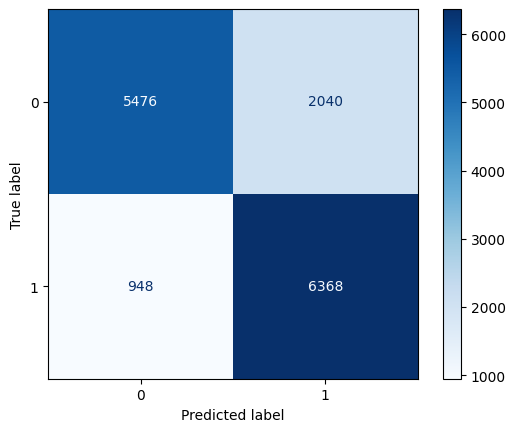

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## KERAS WITH RandomGridSearch HYPER TUNING

In [6]:
%%time

def build_clf(meta, hidden_layer_sizes, dropout):
    n_features_in_ = meta["n_features_in_"]
    n_classes_ = meta["n_classes_"]
    target_encoder_ = meta["target_encoder_"]
    
    model = tf2.keras.models.Sequential()
    model.add(keras.layers.Input(shape=n_features_in_)),
    #for hidden_layer_size in hidden_layer_sizes:
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, 
            kernel_initializer= tf2.keras.initializers.GlorotUniform(), 
            bias_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), 
            activation="relu"))
        model.add(keras.layers.Dropout(dropout))
    model.add(tf2.keras.layers.Dense(1, activation='sigmoid'))
    
    #though you could return a compiled model, it's not necessary, and would result in the loss of these
    # parameters in the tune process - as they would be 'hard coded'
    # model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) 

    return model


CPU times: total: 0 ns
Wall time: 0 ns


In [7]:
%%time

# If you don't have the following installed, from command line '!pip install scikeras'
from scikeras.wrappers import KerasClassifier

keras_clf = KerasClassifier(
    model=build_clf,
    hidden_layer_sizes=11,
    dropout=0.5,
    optimizer=keras.optimizers.Adam,
    optimizer__learning_rate=0.0001
)
keras_clf.get_params()


CPU times: total: 62.5 ms
Wall time: 60.7 ms


{'model': <function __main__.build_clf(meta, hidden_layer_sizes, dropout)>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam,
 'loss': None,
 'metrics': None,
 'batch_size': None,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 1,
 'hidden_layer_sizes': 11,
 'dropout': 0.5,
 'optimizer__learning_rate': 0.0001,
 'class_weight': None}

In [8]:
%%time

params = {
    
    # the following are model parameters, and therefore must be defined as parameters in the KarasClassifier, and then in the build_clf function
    'model__hidden_layer_sizes': [(70,),(90, ), (100,), (100, 90)], # this will require KarasClassifier and build_clf to have hidden_layer_sizes parameter set
    'model__dropout': [0, 0.1], # this will require KarasClassifier and build_clf to have hidden_layer_sizes parameter set
    
    # the following are 'fit' parameters, the scikeras wrapper provides these parameters. These are passed to the 'model.fit' method for each fit of the model
    'batch_size':[20, 60, 100],
    'epochs':[10],
    'optimizer':['adam','sgd'],
    'loss':['binary_crossentropy'],
    
    # this is added to the optimizer 
    'optimizer__learning_rate': [0.0001, 0.001, 0.01]

}
keras_clf.get_params()

CPU times: total: 0 ns
Wall time: 0 ns


{'model': <function __main__.build_clf(meta, hidden_layer_sizes, dropout)>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam,
 'loss': None,
 'metrics': None,
 'batch_size': None,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 1,
 'hidden_layer_sizes': 11,
 'dropout': 0.5,
 'optimizer__learning_rate': 0.0001,
 'class_weight': None}

In [9]:
%%time

from sklearn.model_selection import RandomizedSearchCV
#from tensorflow.keras.callbacks import EarlyStopping

rnd_search_cv = RandomizedSearchCV(
    estimator=keras_clf, 
    param_distributions=params, 
    scoring='recall',  # we could use any appropriate sklearn metric here (i.e. accuracy, f1_micro, f1_macro)
    n_iter=50, 
    cv=3)

# In rare cases, you may find your model training results in exceeding python's default recursion limit.
# If needed, you can increase this excersion limit by using the following code.
#import sys
#sys.setrecursionlimit(10000) # note: the default is 3000 (python 3.9)

_ = rnd_search_cv.fit(train_X, train_y,  verbose=1)

# You can create 'call back' functions. These are functions that will be called at the 
# end of each epoch. There are a number of builtin functions created for this purpose, 
# one of which is EarlyStopping -- that, based on the parameters you give, will stop
# the training process. This is useful when the algorithm is not making any significant
# gains through further training. 
#earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
#callback = [earlystop]
#_ = rnd_search_cv.fit(X_train, y_train, callbacks=callback, verbose=0)


Epoch 1/10
1154/1154 [==============================] - 45s 36ms/step - loss: 14.6638
Epoch 2/10
1154/1154 [==============================] - 40s 35ms/step - loss: 0.5974
Epoch 3/10
1154/1154 [==============================] - 41s 35ms/step - loss: 0.5766
Epoch 4/10
1154/1154 [==============================] - 48s 42ms/step - loss: 0.5698
Epoch 5/10
1154/1154 [==============================] - 45s 39ms/step - loss: 0.5608
Epoch 6/10
1154/1154 [==============================] - 42s 36ms/step - loss: 0.5467
Epoch 7/10
1154/1154 [==============================] - 43s 37ms/step - loss: 0.5948
Epoch 8/10
1154/1154 [==============================] - 42s 37ms/step - loss: 0.5433
Epoch 9/10
1154/1154 [==============================] - 41s 36ms/step - loss: 0.5666
Epoch 10/10
577/577 [==============================] - 20s 34ms/step
Epoch 1/10
1154/1154 [==============================] - 48s 39ms/step - loss: 20.7024
Epoch 2/10
1154/1154 [==============================] - 43s 37ms/step - loss: 0

In [10]:
rnd_search_cv.best_params_

{'optimizer__learning_rate': 0.01,
 'optimizer': 'adam',
 'model__hidden_layer_sizes': (100, 90),
 'model__dropout': 0,
 'loss': 'binary_crossentropy',
 'epochs': 10,
 'batch_size': 100}

In [12]:
best_model = rnd_search_cv.best_estimator_

In [13]:
%%time

print(f"best score {best_model.score(test_X, test_y)}")
print(f"min loss {min(best_model.history_['loss'])}")

149/149 [==============================] - 0s 1ms/step
best score 0.8069714131607335
min loss 0.415894091129303
CPU times: total: 2.12 s
Wall time: 430 ms


In [14]:
best_model.history_

defaultdict(list,
            {'loss': [5.580031871795654,
              0.571007490158081,
              0.44407621026039124,
              0.4370590150356293,
              0.4364427328109741,
              0.42092058062553406,
              0.4236922264099121,
              0.415894091129303,
              0.4219512343406677,
              0.4168497622013092]})

149/149 [==============================] - 0s 3ms/step


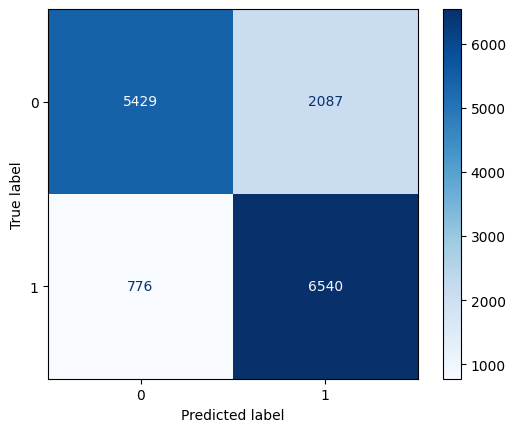

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, best_model.predict(test_X))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [17]:
from sklearn.metrics import classification_report

print(classification_report(test_y, best_model.predict(test_X), digits=4))

149/149 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0     0.8749    0.7223    0.7913      7516
           1     0.7581    0.8939    0.8204      7316

    accuracy                         0.8070     14832
   macro avg     0.8165    0.8081    0.8059     14832
weighted avg     0.8173    0.8070    0.8057     14832



## 2.1 Wide Network

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

model_wide = keras.models.Sequential()
model_wide.add(keras.layers.Input(11))
model_wide.add(keras.layers.Dense(256, activation="relu"))
model_wide.add(keras.layers.Dense(1, activation="sigmoid"))

In [19]:
model_wide.summary()

Model: "sequential_151"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_345 (Dense)           (None, 256)               3072      
                                                                 
 dense_346 (Dense)           (None, 1)                 257       
                                                                 
Total params: 3,329
Trainable params: 3,329
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_wide.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [21]:
history = model_wide.fit(train_X, train_y, epochs=50, validation_data=(test_X, test_y))

Epoch 1/50
1082/1082 [==============================] - 5s 4ms/step - loss: 584.3539 - accuracy: 0.6946 - val_loss: 0.5891 - val_accuracy: 0.7020
Epoch 2/50
1082/1082 [==============================] - 4s 4ms/step - loss: 0.5595 - accuracy: 0.7224 - val_loss: 0.5411 - val_accuracy: 0.7313
Epoch 3/50
1082/1082 [==============================] - 4s 4ms/step - loss: 0.5439 - accuracy: 0.7256 - val_loss: 0.5456 - val_accuracy: 0.7173
Epoch 4/50
1082/1082 [==============================] - 4s 4ms/step - loss: 0.5339 - accuracy: 0.7299 - val_loss: 0.5584 - val_accuracy: 0.6975
Epoch 5/50
1082/1082 [==============================] - 4s 4ms/step - loss: 0.5268 - accuracy: 0.7305 - val_loss: 0.5195 - val_accuracy: 0.7338
Epoch 6/50
1082/1082 [==============================] - 4s 4ms/step - loss: 0.5231 - accuracy: 0.7337 - val_loss: 0.5095 - val_accuracy: 0.7356
Epoch 7/50
1082/1082 [==============================] - 4s 4ms/step - loss: 0.5182 - accuracy: 0.7389 - val_loss: 0.5020 - val_accurac

In [22]:
loss, accuracy = model_wide.evaluate(test_X, test_y)

464/464 [==============================] - 1s 1ms/step - loss: 0.4665 - accuracy: 0.7858


In [23]:
print(f"Loss {loss:.5f}\nAccuracy {accuracy:.4f}")

Loss 0.46653
Accuracy 0.7858


In [24]:
model_wide.summary()

Model: "sequential_151"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_345 (Dense)           (None, 256)               3072      
                                                                 
 dense_346 (Dense)           (None, 1)                 257       
                                                                 
Total params: 3,329
Trainable params: 3,329
Non-trainable params: 0
_________________________________________________________________


In [25]:
import collections

# for reference, list the frequency of each digit found in the y_test data
print(sorted(collections.Counter(test_y).items(), key=lambda i: i[0]))

[(0, 7516), (1, 7316)]


464/464 [==============================] - 1s 936us/step


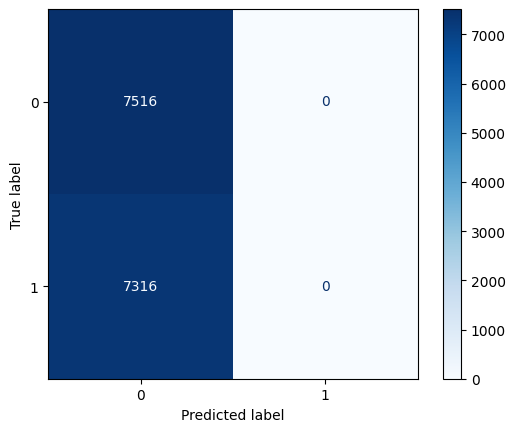

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# display the confusion matrix
y_pred = model_wide.predict(test_X).argmax(axis=1)
cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [27]:
from sklearn.metrics import classification_report

print(classification_report(test_y, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.5067    1.0000    0.6726      7516
           1     0.0000    0.0000    0.0000      7316

    accuracy                         0.5067     14832
   macro avg     0.2534    0.5000    0.3363     14832
weighted avg     0.2568    0.5067    0.3409     14832



## 2.2 Deep Network

In [28]:
from tensorflow import keras
from tensorflow.keras import layers

In [29]:
model_deep = keras.models.Sequential()
model_deep.add(keras.layers.Input(11))
model_deep.add(keras.layers.Dense(200, activation="relu"))
model_deep.add(keras.layers.Dense(200, activation="relu"))
model_deep.add(keras.layers.Dense(200, activation="relu"))
model_deep.add(keras.layers.Dense(1, activation="sigmoid"))

We can also create this network using the syntax below...

In [30]:
input_ = keras.layers.Input(11)
hidden1 = keras.layers.Dense(128, activation="relu")(input_)
hidden2 = keras.layers.Dense(128, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(128, activation="relu")(hidden2)
hidden4 = keras.layers.Dense(128, activation="relu")(hidden3)
output = keras.layers.Dense(1, activation="sigmoid")(hidden4)
model_deep = keras.Model(inputs=[input_], outputs=[output])

In [31]:
model_deep.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [32]:
history = model_deep.fit(train_X, train_y, epochs=50, validation_data=(test_X, test_y))


Epoch 1/50
1082/1082 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.4974 - val_loss: nan - val_accuracy: 0.5067
Epoch 2/50
1082/1082 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.4971 - val_loss: nan - val_accuracy: 0.5067
Epoch 3/50
1082/1082 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.4971 - val_loss: nan - val_accuracy: 0.5067
Epoch 4/50
1082/1082 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.4971 - val_loss: nan - val_accuracy: 0.5067
Epoch 5/50
1082/1082 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.4971 - val_loss: nan - val_accuracy: 0.5067
Epoch 6/50
1082/1082 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.4971 - val_loss: nan - val_accuracy: 0.5067
Epoch 7/50
1082/1082 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.4971 - val_loss: nan - val_accuracy: 0.5067
Epoch 8/50
1082/1082 [============

In [33]:
loss, accuracy = model_deep.evaluate(test_X, test_y)
print(f"Loss {loss:.5f}\nAccuracy {accuracy:.4f}")

464/464 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.5067
Loss nan
Accuracy 0.5067


In [34]:
model_deep.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_154 (InputLayer)      [(None, 11)]              0         
                                                                 
 dense_351 (Dense)           (None, 128)               1536      
                                                                 
 dense_352 (Dense)           (None, 128)               16512     
                                                                 
 dense_353 (Dense)           (None, 128)               16512     
                                                                 
 dense_354 (Dense)           (None, 128)               16512     
                                                                 
 dense_355 (Dense)           (None, 1)                 129       
                                                                 
Total params: 51,201
Trainable params: 51,201
Non-trainable p

[(0, 7516), (1, 7316)]
464/464 [==============================] - 1s 1ms/step


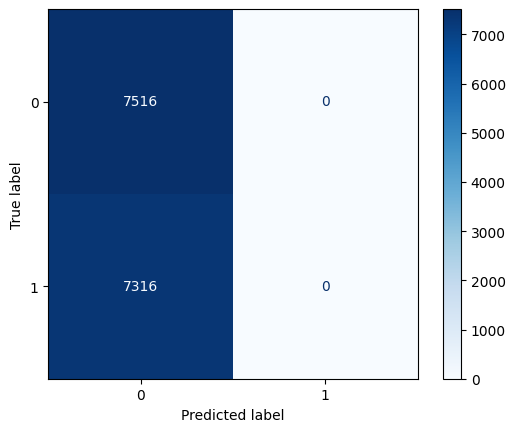

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# for reference, list the frequency of each digit found in the y_test data
print(sorted(collections.Counter(test_y).items(), key=lambda i: i[0]))

# display the confusion matrix
y_pred = model_deep.predict(test_X).argmax(axis=1)
cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [37]:
from sklearn.metrics import classification_report

print(classification_report(test_y, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.5067    1.0000    0.6726      7516
           1     0.0000    0.0000    0.0000      7316

    accuracy                         0.5067     14832
   macro avg     0.2534    0.5000    0.3363     14832
weighted avg     0.2568    0.5067    0.3409     14832



## 2.3 Wide and Deep Network

In [38]:
from tensorflow import keras
from tensorflow.keras import layers

In [39]:
input_ = keras.layers.Input(11)
hidden1 = keras.layers.Dense(128, activation="relu")(input_)
hidden2 = keras.layers.Dense(128, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(128, activation="relu")(hidden2)
hidden4 = keras.layers.Dense(128, activation="relu")(hidden3)
concat = keras.layers.Concatenate()([input_, hidden3])
output = keras.layers.Dense(1, activation="sigmoid")(concat)
model_wide_deep = keras.Model(inputs=[input_], outputs=[output])

In [40]:
model_wide_deep.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
history = model_wide_deep.fit(train_X, train_y, epochs=50, validation_data=(test_X, test_y))

In [41]:
loss, accuracy = model_wide_deep.evaluate(test_X, test_y)
print(f"Loss {loss:.5f}\nAccuracy {accuracy:.4f}")

464/464 [==============================] - 1s 1ms/step - loss: 116.1055 - accuracy: 0.5419
Loss 116.10551
Accuracy 0.5419


In [42]:
model_wide_deep.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_155 (InputLayer)         [(None, 11)]         0           []                               
                                                                                                  
 dense_356 (Dense)              (None, 128)          1536        ['input_155[0][0]']              
                                                                                                  
 dense_357 (Dense)              (None, 128)          16512       ['dense_356[0][0]']              
                                                                                                  
 dense_358 (Dense)              (None, 128)          16512       ['dense_357[0][0]']              
                                                                                            

464/464 [==============================] - 1s 1ms/step


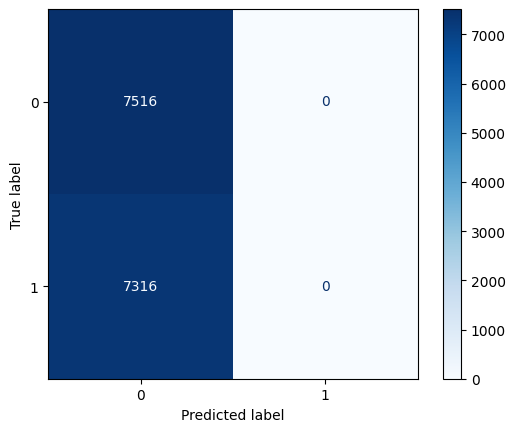

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# display the confusion matrix
y_pred = model_wide_deep.predict(test_X).argmax(axis=1)
cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [44]:
from sklearn.metrics import classification_report

print(classification_report(test_y, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.5067    1.0000    0.6726      7516
           1     0.0000    0.0000    0.0000      7316

    accuracy                         0.5067     14832
   macro avg     0.2534    0.5000    0.3363     14832
weighted avg     0.2568    0.5067    0.3409     14832



### Notes

### Results

### 1.The MLP Classifier without hyper parameter tuning provided us with a score of 85.96%
### 2.where as the MLP classifier with random search hyper parameter tuning provided us with with recall score of 87.06%
### 3.the same in case of keras technique randomsearch hyper parameter tuning provided us with a recall score of 89.39%
### 4.where as the deep, wide and deep adn wide networks provided us with a recall score of 1  and there is o TP AND FP in confusion metrics with tell us there is overfitting and there should not be considered.

### Comparisions

### 1. When Decision Tree Tuning Model predicted salary greater than 50K$, Dtree is correct 94.2% of the time using Grid Search , where as Logistic regression Tuning Model is correct only 80% time.

### 2. Where as keras randomgrid search  Model predicted salary greater than 50K$, keras is correct 89.39% of the time using randomgrid Search , where as Dtree Model is correct  94% time from assignment 1.

### 3. when we comapre the results of models from assignmnet 1 and models from assignment we can say that decision tree provided us with a best recall score of 94%.